## Euler's Method

### Algorithm

```
Function will take following input:(f,t_initial,t_final,y_initial,h)
f(t,y) from y'= f(t,y)
t_initial(starting point of domain)
t_final(ending point of domain)
y_initial(initial condition)
h(step size)


1 Initialize the initial value of y and the initial time t.

2 Set the number of steps n = (t_final - t_initial) / h.

3 Loop from i = 1 to i = n:
  a. Calculate the slope of the function at the current time and value of y     using the given differential equation.
  b. Calculate the new value of y using the formula: y(i) = y(i-1) + h * slope(i-1).
  c. Update the value of time t(i) = t(i-1) + h.

4 Return the values of time and y at each step.
```




In [ ]:
def euler_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------SOLUTION-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        slope = f(t_values[i], y_values[i])
        y_new = y_values[i] + h * slope
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values


In [ ]:
import numpy as np
def f(t,y):
  return np.exp(t)-y

t_E,y_E=euler_method(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0000
----------------------
2	0.20	1.0105
----------------------
3	0.30	1.0316
----------------------
4	0.40	1.0634
----------------------
5	0.50	1.1063
----------------------
6	0.60	1.1605
----------------------
7	0.70	1.2267
----------------------
8	0.80	1.3054
----------------------
9	0.90	1.3974
----------------------
10	1.00	1.5036
----------------------


## RK-4 Method

### Algorithm

To solve:$\dfrac{dy}{dx}=f(x,y)$

$x_{i+1} = x_i + h,\\y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h\\ k_1 = \ f(x_i, y_i),\\ k_2 =  f(x_i + 0.5h, y_i + 0.5 k_1),\\ k_3 =  f(x_i + 0.5h, y_i + 0.5 k_2).\\ k_4 = f(x_i + h, y_i + k_3),
 \\ $

```
Function will take following input:(f,t_initial,t_final,y_initial,h)
f(t,y) from y'= f(t,y)
t_initial(starting point of domain)
t_final(ending point of domain)
y_initial(initial condition)
h(step size)


1 Initialize the initial value of y and the initial time t.

2 Set the number of steps n = (t_final - t_initial) / h.

3 Loop from i = 1 to i = n:
  a)Calculate
      k1 =  f(x0, y0)
      k2 =  f(x0+h/2, y0+k1/2)
      k3 =  f(x0+h/2, y0+k2/2)
      k4 =  f(x0+h, y0+k3)

  b) Calculate the new value of y using the formula: y(i) = y(i-1) + (k1+2*k2+2*k3+k4)*h/6
  c) Update the value of time t(i) = t(i-1) + h.

4 Return the values of time and y at each step.
```

In [ ]:
def RK4_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------SOLUTION-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        k1 = f(t_values[i], y_values[i])
        k2 = f(t_values[i]+0.5*h, y_values[i]+0.5*k1)
        k3 = f(t_values[i]+h/2, y_values[i]+k2/2)
        k4 = f(t_values[i]+h, y_values[i]+k3)
        y_new = y_values[i] + (h/6) * (k1+2*k2+2*k3+k4)
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values


In [ ]:
import numpy as np
def f(t,y):
  return np.exp(t)-y

t_R,y_R=RK4_method(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0039
----------------------
2	0.20	1.0145
----------------------
3	0.30	1.0322
----------------------
4	0.40	1.0573
----------------------
5	0.50	1.0903
----------------------
6	0.60	1.1316
----------------------
7	0.70	1.1818
----------------------
8	0.80	1.2416
----------------------
9	0.90	1.3118
----------------------
10	1.00	1.3931
----------------------


## Library Function to solve ODE(IVP)

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
def f(t,y):
  return np.exp(t)-y
sol = solve_ivp(f, [0, 1], [1], t_eval=np.array(np.linspace(0.1,1,10)))
t_l=sol.t
y_l=sol.y.flatten()
print('\n----Library_SOLUTION-------')
print('----------------------')    
print('#\ttn\tyn')
print('----------------------')

for i in range(len(t_l)):
   print('%d\t%.2f\t%.4f'% (i+1,t_l[i],y_l[i]) )
   print('----------------------')
   


----Library_SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0050
----------------------
2	0.20	1.0200
----------------------
3	0.30	1.0451
----------------------
4	0.40	1.0807
----------------------
5	0.50	1.1272
----------------------
6	0.60	1.1851
----------------------
7	0.70	1.2549
----------------------
8	0.80	1.3374
----------------------
9	0.90	1.4332
----------------------
10	1.00	1.5433
----------------------


## Plotting 

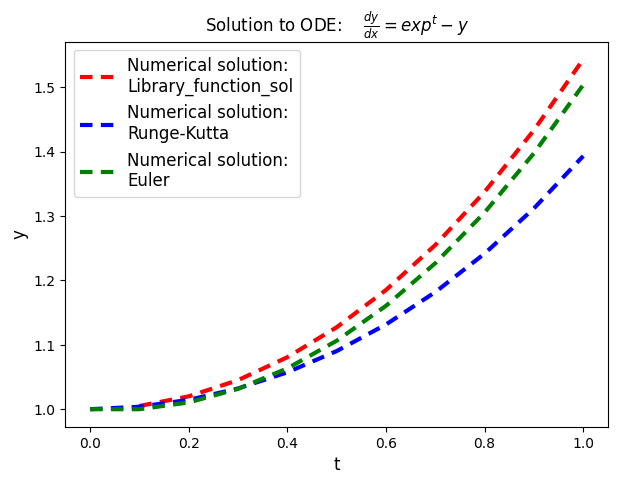

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,5))


plt.plot(t_l, y_l, label="Numerical solution:\nLibrary_function_sol", dashes=(3,2), color="red",lw=3)
plt.plot(t_R, y_R, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",lw=3)
plt.plot(t_E, y_E, label="Numerical solution:\nEuler", dashes=(3,2), color="green",lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=exp^t -y$")
plt.xlabel("t", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()


##Lab Task
```
1- Write the program for Heun's Method.
2- Write the code to make a table to compare error of Heun's, Euler's, RK4 by using analytical solution.
3- Repeat task 2 for three different DEs.

